### BIOL-187, Winter 2020,  Test 3: James Lawson

<font size = '5' color='Red'>
Final score:   73/80 
</font>

**Directions**:

Please compose your code in the appropriate Jupyter Notebook cells below the problem description. 

**Exam Policies**:
- You can use any written resources for this test, however you ARE NOT allowed to discuss verbally (or remotely) this exam with anybody until the end of exam period, except for Dr. Sackman.
- If your code does not produce the desired outcome due to error, your grade will be reduced by 100%.
- To get full credit for each problem, your code should produce neat and informative output. Depending on the problem, you will be asked to produce either an informative printout or a graph. Each problem will require a written conclusion at the end.  See specific details of printout/graphs/conclusion in individual problem descriptions.
- For each question requesting a graph, make sure to label the graph axes (including units, if appropriate), and provide legends and titles as appropriate.
- To get full credit for the test, all data frame manipulations have to be done algorithmially. Avoid making any manual changes to the **diet_study.csv** file in Excel; all data manipulation must be accomplished using python commands.
-  You are welcome to use any parts of any code which has been developed this semester. In fact, you should find the functions we defined in the workshops especially useful.

# Data

Excess body fat has serious consequences for health and excess abdominal fat has been linked to a number of metabolic disorders. To understand  how diet affects fat distribution, researchers at W&L fed one group of female rats a diet high in fat and sugar (HFHS) while another group of female rats consumed a regular (control) diet. At the end of 15 weeks of study, researchers collected data on body weight and abdominal fat. 

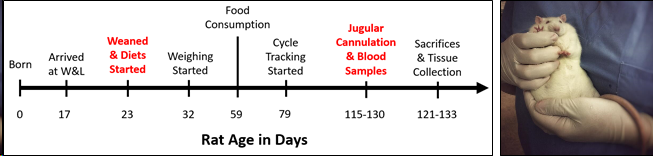

**Abdominal obesity**, also known as central obesity, occurs when excessive abdominal fat around the stomach and abdomen has built up to the extent that it is likely to have a negative impact on health. Several studies demonstrated that Western-style diets, high in fat and sugar lead to abdominal obesity. **Leptin** is a hormone which is released by fat cells (adipocytes), however it is not clear if leptin secretion is affected by abdominal obesity. The researchers in this study were interested to identify the relationship between abdominal adiposity, induced by HFHS diet and leptin secretion.

The file **diet_study.csv** contains data for several metabolic and physiological parameters collected during the study.

Variables:
 - **rat_num** - animal ID in the study
 
 - **Diet** - type of diet (control or HFHS)

 - **Body_weight** - animal weight at the end of the study in grams

 - **Abdominal_fat** -  percent of abdominal fat.  

 - **Testosterone** - concentration of testosterone in terminal blood sample(ng/ml)

 - **Leptin** - concentration of leptin in terminal blood sample(ng/ml)
  

##  Question 1: Exploratory Data Analysis of Leptin concentration (10 pts.)

For your first analysis, you will visually explore how leptin secretion is affected by diet. Conduct exploratory data analysis of the **Leptin** variable by plotting the ECDFs for the control and HFHS diets on the same plot. 

Note: To help your audience to follow your graph, use <font color ='blue'> **blue color for control** <font color ='black'>and <font color ='red'>**red color for HFHS** <font color ='black'> groups. **Keep this color coding consistent for all problems in this exam.** 

Make appropriate title(s), label(s) and legend(s). Are there any visual differences in distribution of leptin concentrarions? **Summarize your plot analysis in 1-3 sentences below the graph.**

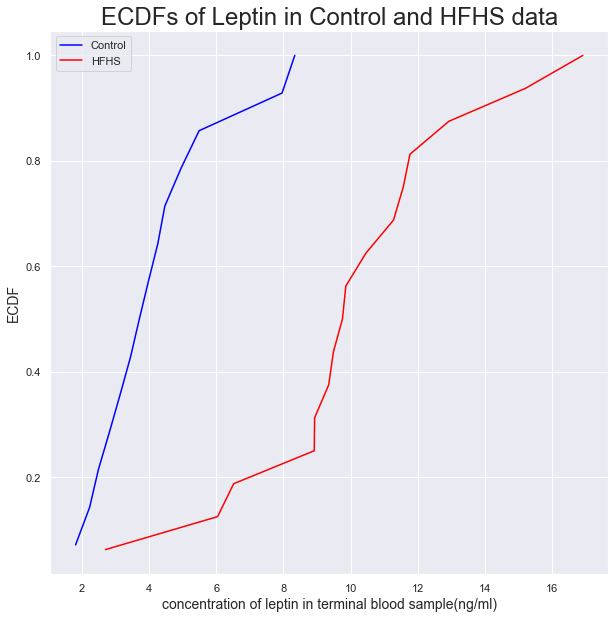

In [7]:
#functions are added here
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

def bootstrap_replicate_1d(data, func):
    # Chosse entries out of the data array
    bs_sample = np.random.choice(data, len(data))
    # Compute statistics using specify function and return the result
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps






#import all necessary libraries
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

#use seaborn plotting settings
sns.set()

#import dataset
df = pd.read_csv('diet_data.csv', index_col = 0)

#figure size is set
plt.figure(figsize = (10, 10))

#data frame with Control data and HFHS data are created
dfControl = df[df.Diet == "Control"]
dfHFHS = df[df.Diet == "HFHS"]

#ecdf function is called on the Control and HFHS data for Leptin
XControl, YControl = ecdf(dfControl.Leptin)
XHFHS, YHFHS = ecdf(dfHFHS.Leptin)

#data is plotted with Control in blue and HFHS in red
plt.plot(XControl, YControl, label="Control", color = "blue")
plt.plot(XHFHS, YHFHS, label="HFHS", color = "red")

#title is added
plt.title("ECDFs of Leptin in Control and HFHS data", fontsize = 24)

#x and y label are created
plt.xlabel("concentration of leptin in terminal blood sample(ng/ml)", fontsize = 14)
plt.ylabel("ECDF", fontsize = 14)

#legend is created
plt.legend(loc="best")

#plot is shown
plt.show()

#### Conclusion

The ECDF of Leptin concentration in terminal blood sample trend is larger in the HFHS group when compared to the Control group.

##  Question 2: Parameter estimates of Diet-induced changes in mean leptin concentration (15 pts.) 

Estimate the mean difference in leptin concentration between the control and HFHS groups. Report a 95% confidence interval for this difference (we have done something similar before). Comment on the difference between the distributions in 1-3 sentences in the **Conclusion** section below.

In [2]:
#diff between means is calculated
diff_means = np.mean(dfControl.Leptin) - np.mean(dfHFHS.Leptin)

#print statement
print("The mean difference in leptin concentration between the control and HFHS groups is:", diff_means)



#take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicatesControl = draw_bs_reps(dfControl.Leptin, np.mean, 10000)
bs_replicatesHFHS = draw_bs_reps(dfHFHS.Leptin, np.mean, 10000)

#confidence intervals are calculated for Control and HFHS
conf_intControl = np.percentile(bs_replicatesControl, [2.5, 97.5])
conf_intHFHS = np.percentile(bs_replicatesHFHS, [2.5, 97.5])

#confidence intervals for the difference between the means is calculated
conf_intBetween = conf_intControl - conf_intHFHS

#print statement
print('95% confidence interval for the difference between the means:', conf_intBetween)

The mean difference in leptin concentration between the control and HFHS groups is: -5.885446428571431
95% confidence interval for the difference between the means: [-5.18291295 -6.46045982]


<font size = '5' color='Red'>
This was not quite done correctly. We wanted to take the difference between the two full bootstrap arrays, and then use np.percentile to get our confidence interval. Taking the middle 95% of each boostrap array and then subtracting the two arrays ends up subtracting from sorted lists, which gives us a much more narrow confidence interval than we should get. The correct code is below.

-7 points
</font>

In [8]:

#confidence intervals for the difference between the means is calculated
conf_intBetween = np.percentile(bs_replicatesControl - bs_replicatesHFHS,[2.5,97.5])

print('95% confidence interval for the difference between the means:', conf_intBetween)

95% confidence interval for the difference between the means: [-7.75940179 -4.01258482]


#### Conclusion

The mean difference in Leptin concentration is smaller in the Control group when compared to the HFHS group. The 95% confidence interval is relativley large with a difference of around 1.2.

## Question 3:Hypothesis test: Does HFHS diet affect leptin secretion?  (15 pts.) 

You probably discovered some difference in leptin concentration between the control and HFHS groups. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean leptin concentration (or a value more extreme than observed) by random chance alone? Calculate a p-value to answer this question.

Below the code in the **Conclusion** section describe the hypothesis you are testing and interpret the computed p-value. Do you think the result is statistically significant? Interpret your finding in an physiological context.

In [3]:
#compute the observed difference in means
diff_obs = diff_of_means(dfControl.Leptin, dfHFHS.Leptin)

#acquire 10,000 permutation replicates of difference in means
perm_replicates = draw_perm_reps(dfControl.Leptin, dfHFHS.Leptin, diff_of_means, size=10000)

#compute and print the p-value: p
p = np.sum(perm_replicates <= diff_obs) / len(perm_replicates)
print('p-val =', p)
print('The probability that we would get the observed difference in mean leptin concentration (or a value more extreme than observed) by random chance alone is:', p)

p-val = 0.0
The probability that we would get the observed difference in mean leptin concentration (or a value more extreme than observed) by random chance alone is: 0.0


#### Conclusion:

We are testing the null hypothesis that we would get the observed difference in mean leptin concentration (or a value more extreme than observed) by random chance alone. Since our p value is less than 0.05, we reject the null hypothesis and accept that our result is statistically significant. This finding makes sense in a physiological context because if a diet is high in sugar and fat, there will be more fat cells. If there is a higher concentration of fat cells, there will be a larger amount of Leptin released.

## Question 4: EDA of leptin and abdominal adiposity (10 pts.) 

Since leptin is secreted by adipose cells, it would be reasonable to a hypothesize that animals with greater adiposity due to a HFHS diet would produce more leptin. 

Make a scatter plot of abdominal fat (x-axis) versus leptin (y-axis) for the control and HFHS diets. To separate datasets from different diets, use blue color for control and red for HFHS. Make appropriate label(s) and legend(s). Is there any visual relationship between abdominal adiposity and leptin secretion? Summarize your plot analysis in 1-3 sentences below the graph.

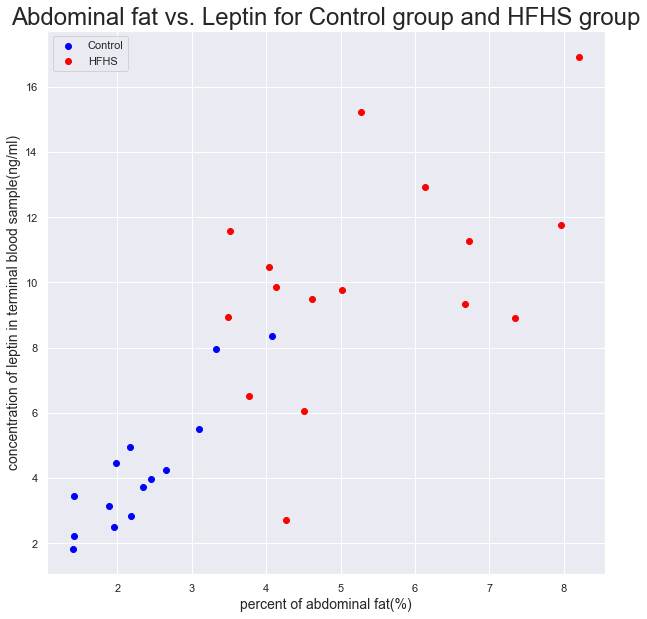

In [4]:
#figure size is set
plt.figure(figsize = (10, 10))

#scatter plot with beak length and beak depth from 1975 and 2012
plt.scatter(dfControl.Abdominal_fat, dfControl.Leptin, color = "blue", label = "Control")
plt.scatter(dfHFHS.Abdominal_fat, dfHFHS.Leptin, color = "red", label = "HFHS")

#legend
plt.legend(loc="best")

#title is created
plt.title("Abdominal fat vs. Leptin for Control group and HFHS group", fontsize = 24)

#x and y labels are created
plt.xlabel("percent of abdominal fat(%)", fontsize = 14)
plt.ylabel("concentration of leptin in terminal blood sample(ng/ml)", fontsize = 14)

#plot is shown
plt.show()

#### Conclusion

For both the Control group and the HFHS group, as percent of abdominal fat increases, the concentration of Leptin also increases. It appears that the control group has much a much lower concentration of fat and a lower concentration of Leptin when compared to the HFHS group.

##  Question 5: Linear regression (15  pts.)

Perform a linear regression of abdominal fat and leptin concentration for both the control and HFHS diet. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

Provide a clear printout of the 95% confidence intervals for the slope and intercept in the control and HFHS groups. Provide a meaningful interpretation of the numerical results in 1-3 sentences below the code in a **Conclusion** section.

In [5]:
#perform a linear regression using np.polyfit(): a, b
a1, b1 = np.polyfit(dfControl.Abdominal_fat, dfControl.Leptin, 1)
a2, b2 = np.polyfit(dfHFHS.Abdominal_fat, dfHFHS.Leptin, 1)

#variables are calculated
x1 = np.array([0,10])
y1 = a1 * x1 + b1

x2 = np.array([0,10])
y2 = a2 * x2 + b2

#slope and intercept is calculated
slopeControl, interceptControl = draw_bs_pairs_linreg(np.array(dfControl.Abdominal_fat), np.array(dfControl.Leptin), size=1000)
slopeHFHS, interceptHFHS = draw_bs_pairs_linreg(np.array(dfHFHS.Abdominal_fat), np.array(dfHFHS.Leptin), size=1000)
conf_intSlopeControl = np.percentile(slopeControl, [2.5, 97.5])
conf_intInterceptControl = np.percentile(interceptControl, [2.5, 97.5])
conf_intSlopeHFHS = np.percentile(slopeHFHS, [2.5, 97.5])
conf_intInterceptHFHS = np.percentile(interceptHFHS, [2.5, 97.5])

#print statements
print("95% confidence interval on the slope of the regression line for the Control group:",conf_intSlopeControl)
print("95% confidence interval on the intercept of the regression line for the Control group:",conf_intInterceptControl)
print("95% confidence interval on the slope of the regression line for the HFHS group:",conf_intSlopeHFHS)
print("95% confidence interval on the intercept of the regression line for the HFHS group:",conf_intInterceptHFHS)

95% confidence interval on the slope of the regression line for the Control group: [1.33719872 2.92798532]
95% confidence interval on the intercept of the regression line for the Control group: [-2.59407152  0.86539163]
95% confidence interval on the slope of the regression line for the HFHS group: [0.17642586 1.94515814]
95% confidence interval on the intercept of the regression line for the HFHS group: [-0.79082897  9.17712506]


#### Conclusion

The slope of the linear regression line for the Control group is much steeper when compared to the slope of the linear regression line for the HFHS group. Additionally, the y intercept of the linear regression line for the control group is much lower when compared to the linear regression line for the HFHS group.

##  Question 6:Displaying the linear regression results (15 pts.)

Now, you will display your linear regression results on a scatter plot. To do this, take the first 100 bootstrap samples and plot the lines. Make sure to use high transparency to be able to see the trend in the data.

Below the graph in **Conclusion** section, summarize the findings in your data analysis. 

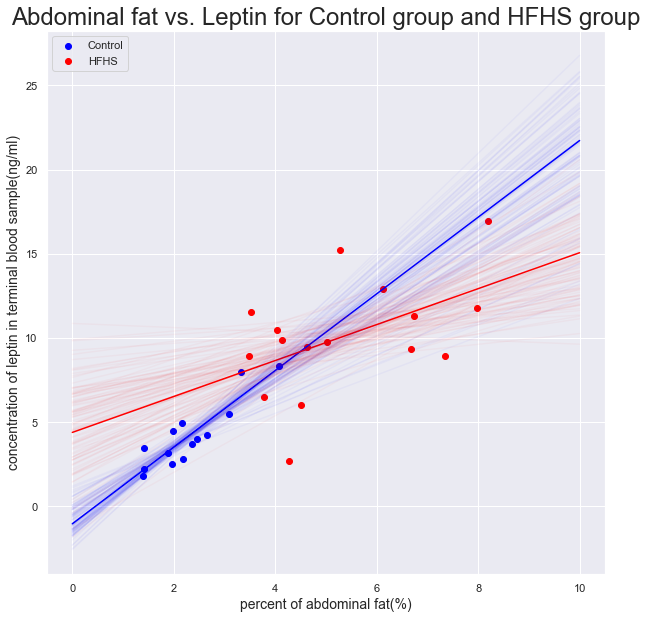

In [6]:
#figure size is set
plt.figure(figsize = (10, 10))

#scatter plot with beak length and beak depth from 1975 and 2012
plt.scatter(dfControl.Abdominal_fat, dfControl.Leptin, color = "blue", label = "Control")
plt.scatter(dfHFHS.Abdominal_fat, dfHFHS.Leptin, color = "red", label = "HFHS")

#title is created
plt.title("Abdominal fat vs. Leptin for Control group and HFHS group", fontsize = 24)

#x and y labels are created
plt.xlabel("percent of abdominal fat(%)", fontsize = 14)
plt.ylabel("concentration of leptin in terminal blood sample(ng/ml)", fontsize = 14)

#linear regression line is added to plot
plt.plot(x1, y1, color = "blue")
plt.plot(x2, y2, color = "red")

#legend
plt.legend(loc="best")

#first 100 bootstrap estimates of slope and intercept is plotted
for i in range(100):
    x = np.array([0, 10])
    plt.plot(x, slopeControl[i] * x + interceptControl[i], color = "blue", label = "Control", alpha = .03)
    
for i in range(100):
    x = np.array([0, 10])
    plt.plot(x, slopeHFHS[i] * x + interceptHFHS[i], color = "red", label = "HFHS", alpha = .03)  

#plot is shown
plt.show()

#### Conclusion

The Control group has a much lower percentage of abdominal fat and a much lower concentration of Leptin when compared to the HFHS group. However, the slope of the regression line for the control group is steeper when compared to the HFHS group.